# Linear Regression
As in any machine learning problem in Linear Regression we start with a hypothesis. In linear regression we model the relation between some input features and a output scalar by a linear model. The hypothesis for linear regression with $n$ input features is defined as 
$$
\hat{y} = h(\pmb{\theta})= \pmb{\theta}^T\pmb{x} =\theta_0 + \theta_1x_1 + \cdots + \theta_nx_n
$$
Here, we include the bias term $\theta_0$ in the weight vector $\pmb{\theta}$  
Now, the parameters/weight vectors are learned using gradient descent method. The cost function used to learn the weights in linear regression is Mean Square Error(MSE) loss function and is defined as:
$$
J(\pmb{\theta}) = \frac{1}{2m} \sum_{i=1}^m [\pmb{\theta}^T\pmb{x}^i - y^i]^2
$$  
<br>
Here, we will use PyTorch for defining and training a linear regression model. PyTorch is a great framework that supports automatic gradient which will be very useful for training very complex model. 

We will first import the required libraries to train and visualize our model. We will read the training data using pandas. Our model is very simple. It has only one input feature. So the model will fit two parameters. One weight and one bias parameter.

In [105]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import torch
from torch import nn, optim, autograd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload

# loading data
data = pd.read_csv('ex1data1.txt',header=None)
data.columns = ['x', 'y']
data.describe()

x          y
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000

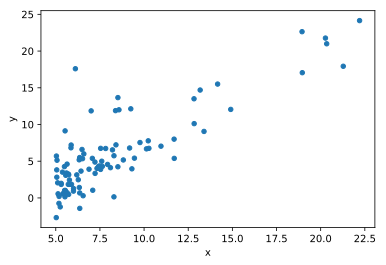

In [106]:
# scatter plot
data.plot.scatter(x='x',y='y')

##### Feature Normalization
Feature Normalization is a very important step for the gradient descent to perform better. Before training the model we will normalize the input features to heave zero mean and a standard deviation of 1.

In [107]:
# feature normalization
mean_x = data.x.mean()
std_x = data.x.std()
x_train = data.x.map(lambda x: (x-mean_x)/std_x).values
y_correct = data['y'].values

##### Defining the Model
We will now define the linear regression model the PyTorch way. Then we will define MSE loss  function as our training cost function. For training the model we will Stochastic Gradient Descent(SGD) method.  

In [108]:
# defining linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        y = self.linear(x)
        return y
    
model = LinearRegressionModel(1,1)
cost = nn.MSELoss()
alpha = 0.003 # learning rate
optimizer = optim.SGD(model.parameters(), lr = alpha)


##### Training Loop
We will now train the model for 2000 epochs. We will keep track of the loss/cost in each epoch which will be used to plot the learning curve later on.

In [109]:
# training loop
epochs = 2000
losses = np.zeros(epochs)
for epoch in range(epochs):
    
    x = autograd.Variable(torch.from_numpy(x_train)).float().view(-1,1)
    y = autograd.Variable(torch.from_numpy(y_correct)).float().view(-1,1)
    
    optimizer.zero_grad()
    
    y_ = model.forward(x)
    loss = cost(y_,y)
    loss.backward()
    optimizer.step()
    
    losses[epoch] = loss.item()

##### Learning Curve

<IPython.core.display.Javascript object>


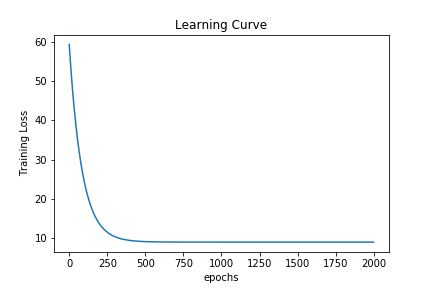

In [110]:
%matplotlib notebook

fig = plt.figure("Learning Curve")
plt.plot(np.arange(epochs),losses)
plt.title("Learning Curve")
plt.xlabel("epochs")
plt.ylabel("Training Loss")
plt.show()

##### Plotting the Model

<IPython.core.display.Javascript object>


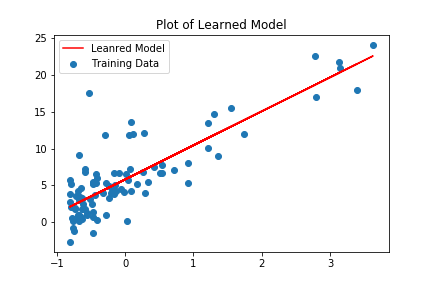

In [111]:
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()
y = x_train*w.flatten() + b.flatten()

fig = plt.figure("Plot of Learned Model")
p1 = plt.scatter(x_train,y_correct, label="Training Data")
p2 = plt.plot(x_train,y,'r',label="Leanred Model")
plt.title("Plot of Learned Model")
plt.legend()
plt.show();